In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt 

In [3]:
env = gym.make("FrozenLake-v1").env


Action Space : Discrete(4)

Observation Space : Discrete(16)

Import gym.make("FrozenLake-v1")

Action Space
0: LEFT

1: DOWN

2: RIGHT

3: UP

In [5]:
# makes environment deterministic
# from importlib.metadata import entry_points
# from gym.envs.registration import register
# register(
#     id="FrozenLakeNotSlippery-v1",
#     entry_point = "gym.envs.toy_text:FrozenLakeEnv",
#     kwargs = {"map_name": "4x4", "is_slippery": False},
#     max_episode_steps = 100,
#     reward_threshold = 0.78 # optimum = .8196
# )

In [4]:
# Q table
q_table = np.zeros([env.observation_space.n,env.action_space.n])

In [6]:
# Hyperparameter
alpha = 0.8
gamma = 0.95
epsilon = 0.1

In [9]:
# Plotting Metrix
reward_list = []

episode_number = 75000
for i in range(1,episode_number):
    # initialize enviroment
    state = env.reset()
    reward_count = 0
    while True:
        if random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])
        # action process and take reward/ observation
        next_state, reward, done, _ = env.step(action)

        # Q learning function
        old_value = q_table[state,action] # old_value
        next_max = np.max(q_table[next_state]) # next_max
        next_value = (1-alpha)*old_value + alpha*(reward + gamma*next_max)

        # Q table update
        q_table[state,action] = next_value

        # update state
        state = next_state
        reward_count += reward

        if done:
            break

        reward_count += reward

    if i%10 == 0:
        reward_list.append(reward_count)
        print("Episode: {}, reward {}".format(i,reward_count))

Episode: 10, reward 0.0
Episode: 20, reward 0.0
Episode: 30, reward 0.0
Episode: 40, reward 0.0
Episode: 50, reward 0.0
Episode: 60, reward 0.0
Episode: 70, reward 0.0
Episode: 80, reward 0.0
Episode: 90, reward 1.0
Episode: 100, reward 0.0
Episode: 110, reward 1.0
Episode: 120, reward 1.0
Episode: 130, reward 1.0
Episode: 140, reward 1.0
Episode: 150, reward 0.0
Episode: 160, reward 0.0
Episode: 170, reward 0.0
Episode: 180, reward 0.0
Episode: 190, reward 0.0
Episode: 200, reward 0.0
Episode: 210, reward 0.0
Episode: 220, reward 0.0
Episode: 230, reward 0.0
Episode: 240, reward 0.0
Episode: 250, reward 0.0
Episode: 260, reward 0.0
Episode: 270, reward 1.0
Episode: 280, reward 0.0
Episode: 290, reward 0.0
Episode: 300, reward 0.0
Episode: 310, reward 0.0
Episode: 320, reward 1.0
Episode: 330, reward 0.0
Episode: 340, reward 0.0
Episode: 350, reward 0.0
Episode: 360, reward 0.0
Episode: 370, reward 0.0
Episode: 380, reward 0.0
Episode: 390, reward 0.0
Episode: 400, reward 0.0
Episode: 

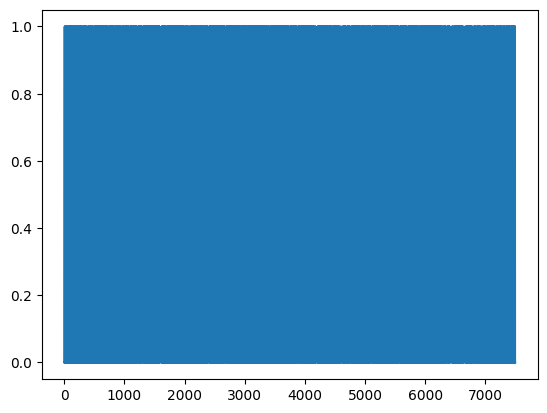

In [10]:
plt.plot(reward_list)